In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # need this for setting time axis dates
from datetime import datetime
from datetime import timedelta

In [3]:
directory = 'C:/Users/a86963/Documents/data/NOVAFOODIES_Shuttle_read_out/'

In [4]:
sup = pd.read_csv(f'{directory}sup_march2024.csv')
deep = pd.read_csv(f'{directory}deep_march2024.csv')

In [5]:
# I manually changed the names in the csv files for easier access to the indices
# the original files are in my dropbox and one drive. temperature is in degrees celcius
sup['Date'] = pd.to_datetime(sup['Date'], format='%d/%m/%Y') # need to reformat them to satetiome objects for the resampling to work
deep['Date'] = pd.to_datetime(deep['Date'], format='%d/%m/%Y')

In [6]:
sup['Date'] = sup['Date'].astype(str)
sup['Time'] = sup['Time'].astype(str)
deep['Date'] = deep['Date'].astype(str)
deep['Time'] = deep['Time'].astype(str)

In [7]:
# Combine "Date" and "Time" columns into a single datetime column
sup['Datetime'] = pd.to_datetime(sup['Date'] + ' ' + sup['Time'])
deep['Datetime'] = pd.to_datetime(deep['Date'] + ' ' + deep['Time'])


# Set the new "Datetime" column as the index
sup.set_index('Datetime', inplace=True)
deep.set_index('Datetime', inplace= True)

In [8]:
# convert the 'Temp' column to numeric values
sup['Temp'] = pd.to_numeric(sup['Temp'], errors='coerce')
deep['Temp'] = pd.to_numeric(deep['Temp'], errors='coerce')

# drop rows with missing values in the 'Temp' column
sup.dropna(subset=['Temp'], inplace=True)
deep.dropna(subset=['Temp'], inplace=True)

In [9]:
# Resample the DataFrame by daily frequency and calculate the mean temperature for each day/week/month/whatever u want:)
sup_daily_downsampled = sup.resample('D').agg({'Temp': 'mean'}) # use D, W, SM, M, H...
deep_daily_downsampled = deep.resample('D').agg({'Temp': 'mean'})

# reset the index to make the 'Datetime' column a regular column - otherwise becomes a new subheader n makes the ds structure weird
sup_daily_downsampled = sup_daily_downsampled.reset_index()
deep_daily_downsampled = deep_daily_downsampled.reset_index()

In [10]:
# this is the sentinel 3 data we exported from the pixels, to try to compare to the temp here: but it hink the datasets dont overlap enough! since so many bad days in february and march:(

feb_apr_data = 'C:/Users/a86963/Documents/data/time-series/feb-april24/processed/feb-apr-24_OL_2_WFR_measurements.txt'

jul_data = 'C:/Users/a86963/Documents/data/time-series/july-sept23/processed/july_OL_2_WFR_measurements.txt'
august_data = 'C:/Users/a86963/Documents/data/time-series/july-sept23/processed/august_OL_2_WFR_measurements.txt'
sept1_data = 'C:/Users/a86963/Documents/data/time-series/july-sept23/processed/sept1_OL_2_WFR_measurements.txt'
sept2_data = 'C:/Users/a86963/Documents/data/time-series/july-sept23/processed/sept2_OL_2_WFR_measurements.txt'

feb_apr_ds = pd.read_csv(feb_apr_data, sep="\t")

feb_apr_ds['datetime'] = pd.to_datetime(feb_apr_ds['Date(yyyy-MM-dd)'] + ' ' + feb_apr_ds['Time(HH_mm_ss)'], format='mixed') # mixed, since its with hyphens and colons. 
feb_apr_ds.sort_values(by='datetime', inplace=True)
feb_apr_ds.reset_index(drop=True, inplace=True)

In [11]:
# concatenating the 4 datasets for the summer period: 
july_df = pd.read_csv(jul_data, sep="\t")
august_df = pd.read_csv(august_data, sep="\t")
september1_df = pd.read_csv(sept1_data, sep="\t")
september2_df = pd.read_csv(sept2_data, sep="\t")

jul_sept_df = pd.concat([july_df, august_df, september1_df, september2_df])

In [12]:
# Combine 'Date' and 'Time' columns into a single datetime column
jul_sept_df['datetime'] = pd.to_datetime(jul_sept_df['Date(yyyy-MM-dd)'] + ' ' + jul_sept_df['Time(HH_mm_ss)'], format='mixed') # mixed, since its with hyphens and colons. 

# order them in terms of time
jul_sept_df.sort_values(by='datetime', inplace=True)

# this means that some of the coords are not in the right order ie 0 1 2 3, since am using sentinel a and b data, and if the times are the same/ similar, its ordered this way. unsure if this is ideal. 

# Reset indices, so starts from 0 and goes all the way through
jul_sept_df.reset_index(drop=True, inplace=True)

# drop the 'Date' and 'Time' columns if you don't need them anymore
jul_sept_df.drop(['Date(yyyy-MM-dd)', 'Time(HH_mm_ss)'], axis=1, inplace=True)

In [13]:
directory_insitu = 'C:/Users/a86963/Documents/data/time-series/'

In [14]:
insitu_chla = pd.read_csv(f'{directory_insitu}/insitu_data_novafoodies_simplified.csv')  # in situ data for chl-a from novafoodies project
insitu_chla['DATE'] = pd.to_datetime(insitu_chla['DATE'], format='%d/%m/%Y') # need to reformat them to satetiome objects for the resampling to work


In [ ]:
# first step: check for contanimation from masks in S3 data:

In [15]:
len(jul_sept_df) # first check of length before masking

155

In [16]:
masks_oc4me = [
    "WQSF_lsb_INVALID",
    "WQSF_lsb_CLOUD",
    "WQSF_lsb_CLOUD_AMBIGUOUS",
    "WQSF_lsb_CLOUD_MARGIN",
    "WQSF_lsb_HISOLZEN",
    "WQSF_lsb_ADJAC",
    "WQSF_lsb_COASTLINE",
    "WQSF_msb_ANNOT_ABSO_D",
    "WQSF_lsb_COSMETIC",
    "WQSF_lsb_SUSPECT",
    "WQSF_lsb_HIGHGLINT",
    "WQSF_lsb_WHITECAPS",
    "WQSF_lsb_AC_FAIL",
    "WQSF_lsb_OC4ME_FAIL",
    "WQSF_msb_RWNEG_O2",
    "WQSF_msb_RWNEG_O3",
    "WQSF_msb_RWNEG_O4",
    "WQSF_msb_RWNEG_O5",
    "WQSF_msb_RWNEG_O6",
    "WQSF_msb_RWNEG_O7",
    "WQSF_msb_RWNEG_O8"
]


In [17]:
masks_nn = [
    "WQSF_lsb_INVALID",
    "WQSF_lsb_CLOUD",
    "WQSF_lsb_CLOUD_AMBIGUOUS",
    "WQSF_lsb_CLOUD_MARGIN",
    "WQSF_lsb_HISOLZEN",
    "WQSF_lsb_ADJAC",
    "WQSF_lsb_COASTLINE",
    "WQSF_msb_ANNOT_ABSO_D",
    "WQSF_lsb_COSMETIC",
    "WQSF_lsb_SUSPECT",
    "WQSF_lsb_HIGHGLINT",
    "WQSF_lsb_OCNN_FAIL"
]


In [18]:
# Create a boolean mask where all conditions must be True
mask = (feb_apr_ds[masks_oc4me] != 1).all(axis=1)

# Apply the mask to filter the DataFrame
feb_apr_ds_oc4me = feb_apr_ds[mask]

In [19]:
# Create a boolean mask where all conditions must be True
mask = (feb_apr_ds[masks_nn] != 1).all(axis=1)

# Apply the mask to filter the DataFrame
feb_apr_ds_nn = feb_apr_ds[mask]

In [20]:
# same for jul-sept dataset
mask = (jul_sept_df[masks_oc4me] != 1).all(axis=1)

# Apply the mask to filter the DataFrame
jul_sept_df_oc4me = jul_sept_df[mask]


In [21]:
# same for jul-sept dataset
mask = (jul_sept_df[masks_nn] != 1).all(axis=1)

# Apply the mask to filter the DataFrame
jul_sept_df_nn = jul_sept_df[mask]


In [22]:
len(jul_sept_df_oc4me) # post masknig check - it did remove some:))

98

In [23]:
sup['Date'] = pd.to_datetime(sup['Date']) # convert to datetime for easier plotting

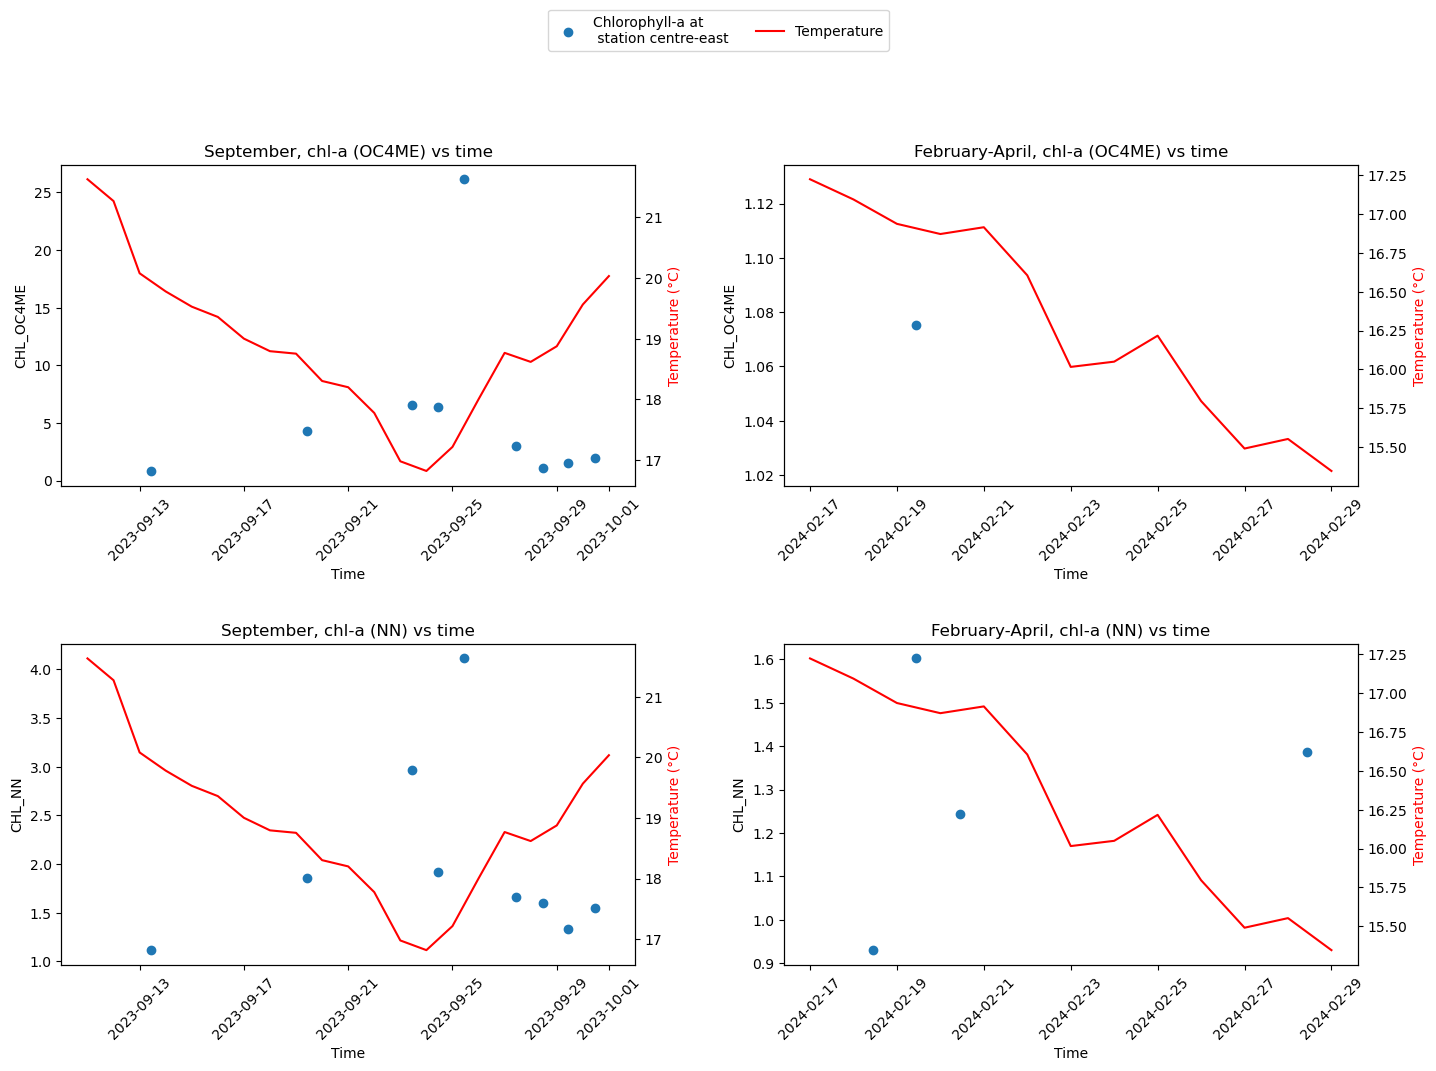

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# first onne
start_date_sept_oc4me = sup_daily_downsampled['Datetime'][0]
end_date_sept_oc4m2 =sup_daily_downsampled['Datetime'][20]

sept_oc4me = jul_sept_df_oc4me[(jul_sept_df_oc4me['datetime'] >= start_date_sept_oc4me) & 
                                  (jul_sept_df_oc4me['datetime'] <= end_date_sept_oc4m2) & 
                                  (jul_sept_df_oc4me['CoordID'] == 3)]
# Filter the temperature data to include only dates within the common time range
filtered_sept_oc4me_temp_data = sup_daily_downsampled[(sup_daily_downsampled['Datetime'] >= start_date_sept_oc4me) & (sup_daily_downsampled['Datetime'] <= end_date_sept_oc4m2)]

axs[0,0].scatter(sept_oc4me['datetime'], sept_oc4me['CHL_OC4ME'], label='Chlorophyll-a at \n station centre-east')
axs[0,0].set_xlabel('Time')
axs[0,0].set_ylabel('CHL_OC4ME')
axs[0,0].set_title('September, chl-a (OC4ME) vs time')
axs[0,0].tick_params(axis='x', rotation=45)
#axs[0,0].legend()

# Plot the filtered temperature data on the same subplotF
ax2_00 = axs[0, 0].twinx()
ax2_00.plot(filtered_sept_oc4me_temp_data['Datetime'], filtered_sept_oc4me_temp_data['Temp'], color='red', label='Temperature')
ax2_00.set_ylabel('Temperature (°C)', color='red')
#ax2_00.legend(loc='upper right')

# 2nd one sept nn

sept_nn = jul_sept_df_nn[(jul_sept_df_nn['datetime'] >= start_date_sept_oc4me) & 
                                  (jul_sept_df_nn['datetime'] <= end_date_sept_oc4m2) & 
                                  (jul_sept_df_nn['CoordID'] == 3)]

# Filter the temperature data to include only dates within the common time range
filtered_sept_nn_temp_data = sup_daily_downsampled[(sup_daily_downsampled['Datetime'] >= start_date_sept_oc4me) & (sup_daily_downsampled['Datetime'] <= end_date_sept_oc4m2)]


axs[1,0].scatter(sept_nn['datetime'], sept_nn['CHL_NN'], label = 'Chlorophyll-a at \n station centre-east')
axs[1,0].set_xlabel('Time')
axs[1,0].set_ylabel('CHL_NN')
axs[1,0].set_title('September, chl-a (NN) vs time')
axs[1,0].tick_params(axis='x', rotation=45)
#axs[1,0].legend()

ax2_10 = axs[1, 0].twinx()
ax2_10.plot(filtered_sept_nn_temp_data['Datetime'], filtered_sept_nn_temp_data['Temp'], color='red', label='Temperature')
ax2_10.set_ylabel('Temperature (°C)', color='red')
#ax2_10.legend(loc='upper right')


# 3rd one

start_date_chl_feb = sup_daily_downsampled['Datetime'][159] 
end_date_chl_feb = datetime(2024, 2, 29)

feb_oc4me = feb_apr_ds_oc4me[(feb_apr_ds_oc4me['datetime'] >= start_date_chl_feb) & 
                                  (feb_apr_ds_oc4me['datetime'] <= end_date_chl_feb) & 
                                  (feb_apr_ds_oc4me['CoordID'] == 3)]
# Filter the temperature data to include only dates within the common time range
filtered_temp_data = sup_daily_downsampled[(sup_daily_downsampled['Datetime'] >= start_date_chl_feb) & (sup_daily_downsampled['Datetime'] <= end_date_chl_feb)]


axs[0,1].scatter(feb_oc4me['datetime'], feb_oc4me['CHL_OC4ME'], label='Chlorophyll-a at \n station centre-east')
axs[0,1].set_xlabel('Time')
axs[0,1].set_ylabel('CHL_OC4ME')
axs[0,1].set_title('February-April, chl-a (OC4ME) vs time')
axs[0,1].tick_params(axis='x', rotation=45)
#axs[0,1].legend()

ax2_01 = axs[0, 1].twinx()
ax2_01.plot(filtered_temp_data['Datetime'], filtered_temp_data['Temp'], color='red', label='Temperature')
ax2_01.set_ylabel('Temperature (°C)', color='red')
#ax2_01.legend(loc='upper right')

## 4th one!
start_date_chl_feb_nn = sup_daily_downsampled['Datetime'][159] 
end_date_chl_feb_nn = datetime(2024, 2, 29)

# Filter the chlorophyll data to include only dates within the common time range
feb_nn_data = feb_apr_ds_nn[(feb_apr_ds_nn['datetime'] >= start_date_chl_feb_nn) & 
                                  (feb_apr_ds_nn['datetime'] <= end_date_chl_feb_nn) & 
                                  (feb_apr_ds_nn['CoordID'] == 3)]

# Filter the temperature data to include only dates within the common time range
filtered_temp_feb_nn_data = sup_daily_downsampled[(sup_daily_downsampled['Datetime'] >= start_date_chl_feb_nn) & (sup_daily_downsampled['Datetime'] <= end_date_chl_feb_nn)]



axs[1,1].scatter(feb_nn_data['datetime'], feb_nn_data['CHL_NN'], label='Chlorophyll-a at \n station centre-east')
axs[1,1].set_xlabel('Time')
axs[1,1].set_ylabel('CHL_NN')
axs[1,1].set_title('February-April, chl-a (NN) vs time')
axs[1,1].tick_params(axis='x', rotation=45)
#axs[1,1].legend()

ax2_11 = axs[1, 1].twinx()
ax2_11.plot(filtered_temp_data['Datetime'], filtered_temp_data['Temp'], color='red', label='Temperature')
ax2_11.set_ylabel('Temperature (°C)', color='red')
#ax2_11.legend(loc='upper right')

# Adjust layout and add a single legend
plt.tight_layout(pad=3.0)

# add legend in!!

# Creating a single legend for all plots
handles, labels = [], []
for ax in axs.flatten():
    for handle, label in zip(*ax.get_legend_handles_labels()):
        if label not in labels:
            handles.append(handle)
            labels.append(label)
for ax in [ax2_00, ax2_10, ax2_01, ax2_11]:
    for handle, label in zip(*ax.get_legend_handles_labels()):
        if label not in labels:
            handles.append(handle)
            labels.append(label)

fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)

plt.show()

In [25]:
# sept_oc4me['CHL_OC4ME'][135] was giving 26.141036987304688 - way too high! lets drop it

jul_sept_df_oc4me = jul_sept_df_oc4me.drop(135)


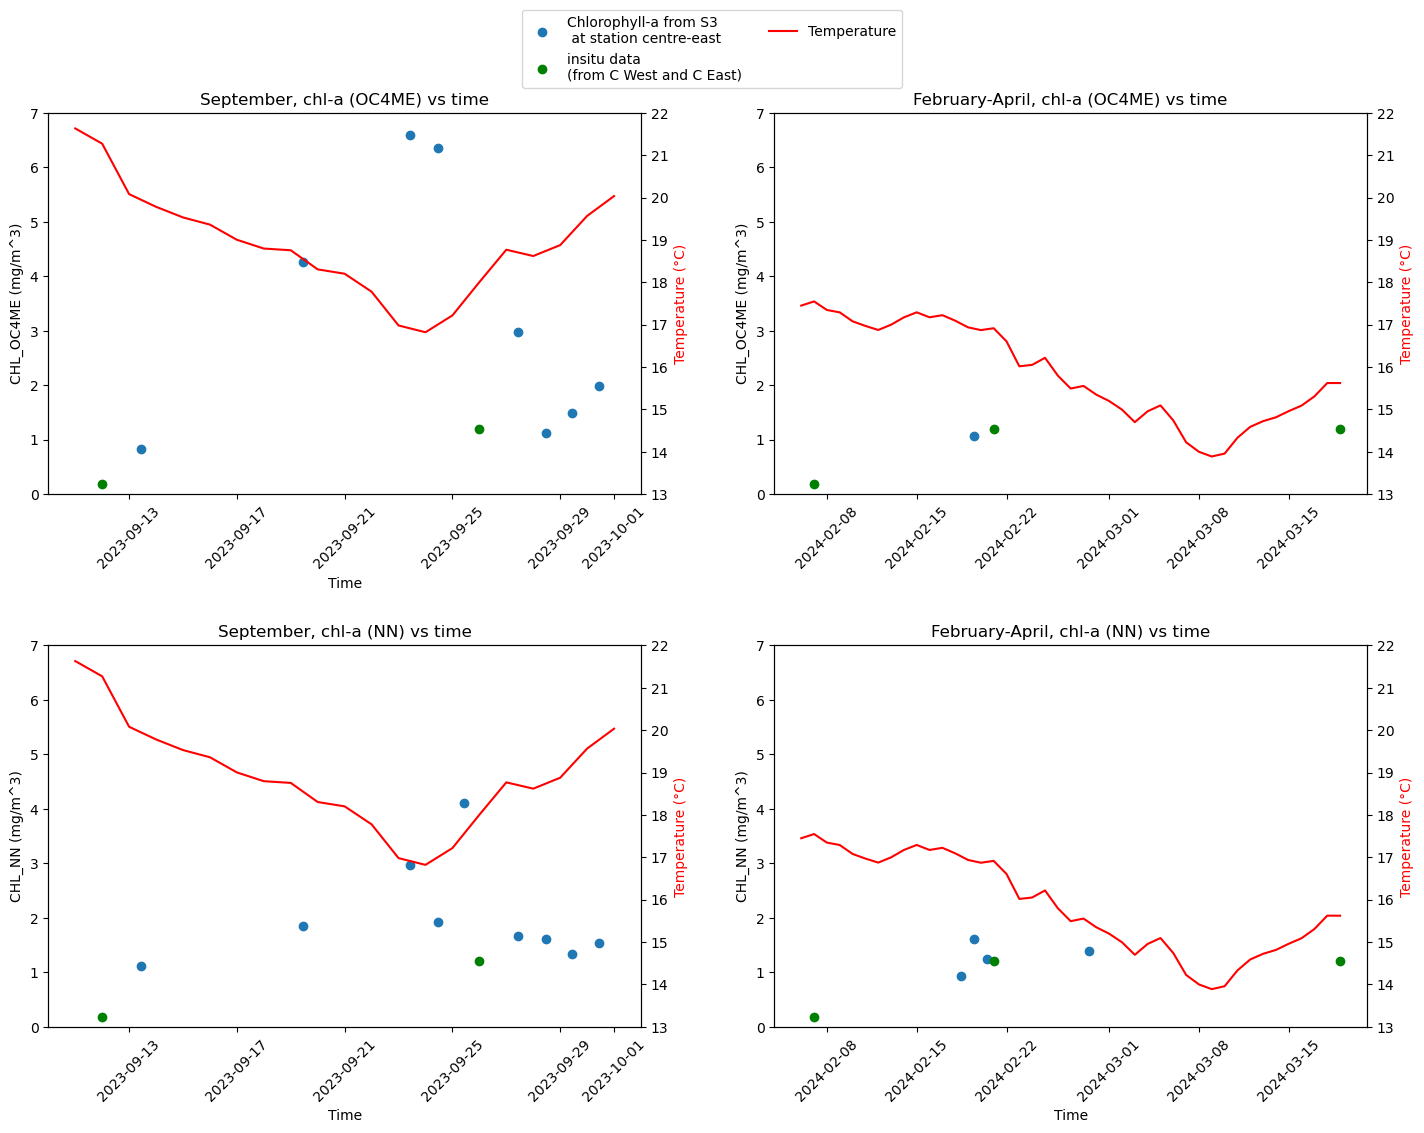

In [32]:
fig, axs = plt.subplots(2, 2, figsize=(15, 11))

# first one
start_date_sept_oc4me = sup_daily_downsampled['Datetime'][0]
end_date_sept_oc4m2 =sup_daily_downsampled['Datetime'][20]

# filter chlorophyll to have only the desired time range

sept_oc4me = jul_sept_df_oc4me[(jul_sept_df_oc4me['datetime'] >= start_date_sept_oc4me) & 
                                  (jul_sept_df_oc4me['datetime'] <= end_date_sept_oc4m2) & 
                                  (jul_sept_df_oc4me['CoordID'] == 3)]
# filter temperature to have only the desired time range
filtered_sept_oc4me_temp_data = sup_daily_downsampled[(sup_daily_downsampled['Datetime'] >= start_date_sept_oc4me) & (sup_daily_downsampled['Datetime'] <= end_date_sept_oc4m2)]

axs[0,0].scatter(sept_oc4me['datetime'], sept_oc4me['CHL_OC4ME'], label='Chlorophyll-a from S3\n at station centre-east')
axs[0,0].scatter(insitu_chla['DATE'][2], insitu_chla['Chla(Spect)'][2],  color = 'green',label = 'insitu data \n(from C West and C East)')
axs[0,0].scatter(insitu_chla['DATE'][3], insitu_chla['Chla(Spect)'][3],  color = 'green',label = 'insitu data \n(from C West and C East)')
axs[0,0].set_xlabel('Time')
axs[0,0].set_ylabel('CHL_OC4ME (mg/m^3)')
axs[0,0].set_title('September, chl-a (OC4ME) vs time')
axs[0,0].tick_params(axis='x', rotation=45)
#axs[0,0].legend() # use if you want individual legends for each sub plot

#plot the filtered temperature data on the same subplot
ax2_00 = axs[0, 0].twinx()
ax2_00.plot(filtered_sept_oc4me_temp_data['Datetime'], filtered_sept_oc4me_temp_data['Temp'], color='red', label='Temperature')
ax2_00.set_ylabel('Temperature (°C)', color='red')
#ax2_00.legend(loc='upper right') # use if you want individual legends for each sub plot

# 2nd one

sept_nn = jul_sept_df_nn[(jul_sept_df_nn['datetime'] >= start_date_sept_oc4me) & 
                                  (jul_sept_df_nn['datetime'] <= end_date_sept_oc4m2) & 
                                  (jul_sept_df_nn['CoordID'] == 3)]

filtered_sept_nn_temp_data = sup_daily_downsampled[(sup_daily_downsampled['Datetime'] >= start_date_sept_oc4me) & (sup_daily_downsampled['Datetime'] <= end_date_sept_oc4m2)]


axs[1,0].scatter(sept_nn['datetime'], sept_nn['CHL_NN'], label='Chlorophyll-a from S3\n at station centre-east')
axs[1,0].scatter(insitu_chla['DATE'][2], insitu_chla['Chla(Spect)'][2],  color = 'green',label = 'insitu data \n(from C West and C East)')
axs[1,0].scatter(insitu_chla['DATE'][3], insitu_chla['Chla(Spect)'][3],  color = 'green',label = 'insitu data \n(from C West and C East)')
axs[1,0].set_xlabel('Time')
axs[1,0].set_ylabel('CHL_NN (mg/m^3)')
axs[1,0].set_title('September, chl-a (NN) vs time')
axs[1,0].tick_params(axis='x', rotation=45)
#axs[1,0].legend()

ax2_10 = axs[1, 0].twinx()
ax2_10.plot(filtered_sept_nn_temp_data['Datetime'], filtered_sept_nn_temp_data['Temp'], color='red', label='Temperature')
ax2_10.set_ylabel('Temperature (°C)', color='red')
#ax2_10.legend(loc='upper right')


# 3rd one

start_date_chl_feb = sup_daily_downsampled['Datetime'][148]
end_date_chl_feb_nn = datetime(2024, 3, 20)

feb_oc4me = feb_apr_ds_oc4me[(feb_apr_ds_oc4me['datetime'] >= start_date_chl_feb) & 
                                  (feb_apr_ds_oc4me['datetime'] <= end_date_chl_feb_nn) & 
                                  (feb_apr_ds_oc4me['CoordID'] == 3)]
filtered_temp_data = sup_daily_downsampled[(sup_daily_downsampled['Datetime'] >= start_date_chl_feb) & (sup_daily_downsampled['Datetime'] <= end_date_chl_feb_nn)]


axs[0,1].scatter(feb_oc4me['datetime'], feb_oc4me['CHL_OC4ME'], label='Chlorophyll-a from S3\n at station centre-east')
axs[0,1].scatter(insitu_chla['DATE'][4], insitu_chla['Chla(Spect)'][2],  color = 'green',label = 'insitu data \n(from C West and C East)')
axs[0,1].scatter(insitu_chla['DATE'][5], insitu_chla['Chla(Spect)'][3],  color = 'green',label = 'insitu data \n(from C West and C East)')
axs[0,1].scatter(insitu_chla['DATE'][6], insitu_chla['Chla(Spect)'][3],  color = 'green', label = 'insitu data \n(from C West and C East)')
axs[0,1].set_ylabel('CHL_OC4ME (mg/m^3)')
axs[0,1].set_title('February-April, chl-a (OC4ME) vs time')
axs[0,1].tick_params(axis='x', rotation=45)
#axs[0,1].legend()

ax2_01 = axs[0, 1].twinx()
ax2_01.plot(filtered_temp_data['Datetime'], filtered_temp_data['Temp'], color='red', label='Temperature')
ax2_01.set_ylabel('Temperature (°C)', color='red')
#ax2_01.legend(loc='upper right')

## 4th one!
start_date_chl_feb_nn = sup_daily_downsampled['Datetime'][148]
end_date_chl_feb_nn = datetime(2024, 3, 20)

feb_nn_data = feb_apr_ds_nn[(feb_apr_ds_nn['datetime'] >= start_date_chl_feb_nn) & 
                                  (feb_apr_ds_nn['datetime'] <= end_date_chl_feb_nn) & 
                                  (feb_apr_ds_nn['CoordID'] == 3)]

filtered_temp_feb_nn_data = sup_daily_downsampled[(sup_daily_downsampled['Datetime'] >= start_date_chl_feb_nn) & (sup_daily_downsampled['Datetime'] <= end_date_chl_feb_nn)]



axs[1,1].scatter(feb_nn_data['datetime'], feb_nn_data['CHL_NN'], label='Chlorophyll-a from S3\n at station centre-east')
axs[1,1].scatter(insitu_chla['DATE'][4], insitu_chla['Chla(Spect)'][2],  color = 'green',label = 'insitu data \n(from C West and C East)')
axs[1,1].scatter(insitu_chla['DATE'][5], insitu_chla['Chla(Spect)'][3],  color = 'green',label = 'insitu data \n(from C West and C East)')
axs[1,1].scatter(insitu_chla['DATE'][6], insitu_chla['Chla(Spect)'][3],  color = 'green',label = 'insitu data \n(from C West and C East)')
axs[1,1].set_xlabel('Time')
axs[1,1].set_ylabel('CHL_NN (mg/m^3)')
axs[1,1].set_title('February-April, chl-a (NN) vs time')
axs[1,1].tick_params(axis='x', rotation=45)
#axs[1,1].legend() 

ax2_11 = axs[1, 1].twinx()
ax2_11.plot(filtered_temp_data['Datetime'], filtered_temp_data['Temp'], color='red', label='Temperature')
ax2_11.set_ylabel('Temperature (°C)', color='red')
#ax2_11.legend(loc='upper right')

plt.tight_layout(pad=2.5) # makes layout a bit nicer for legend - gives some space

for ax_row in axs:
    for ax in ax_row:
        ax.set_ylim(0, 7)

for ax in [ax2_00, ax2_10, ax2_01, ax2_11]:
    ax.set_ylim(13, 22)

# create a legend for all plots, not individual 
handles, labels = [], []
for ax in axs.flatten():
    for handle, label in zip(*ax.get_legend_handles_labels()):
        if label not in labels:
            handles.append(handle)
            labels.append(label)
for ax in [ax2_00, ax2_10, ax2_01, ax2_11]:
    for handle, label in zip(*ax.get_legend_handles_labels()):
        if label not in labels:
            handles.append(handle)
            labels.append(label)

fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)

plt.savefig('C:/Users/a86963/Documents/results/figures/chl-a-S3-insitu-temp.png', bbox_inches='tight') # the bbox thing  ensures the legend is fully saved within the plot - otherwise gets weirdly cropped

plt.show()

In [ ]:
# note: the above code is not the nicest code ever for plotting, since to change things is now quite manual. But it was easier first to do it manually, to be able to change things easily and in a modular and indiviual way.
# i just want to note that it is possible to make this code mroe efficient!  